In [5]:
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()

In [2]:
# only first 2 features for demo
X = iris.data[:,:2]

y = iris.target

In [3]:
clf1 = neighbors.KNeighborsClassifier(n_neighbors=15)
clf1.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [4]:
# Determine the range of the features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [6]:
# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [7]:
# Predict on the meshgrid
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

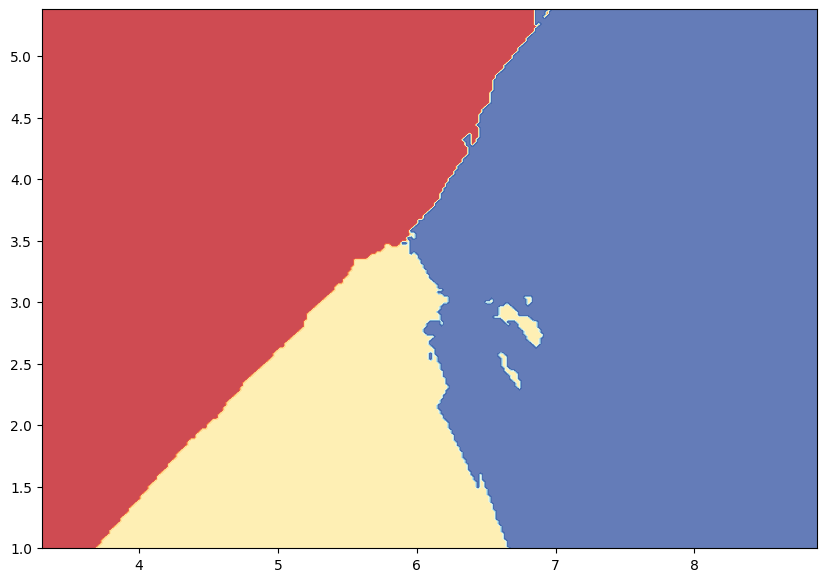

In [ ]:
# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)


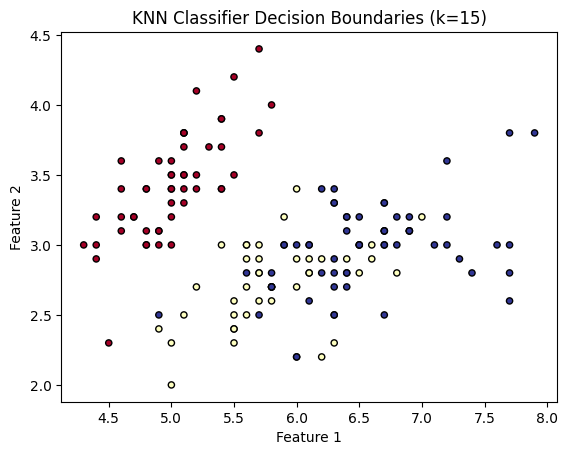

In [9]:
# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.title("KNN Classifier Decision Boundaries (k=15)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

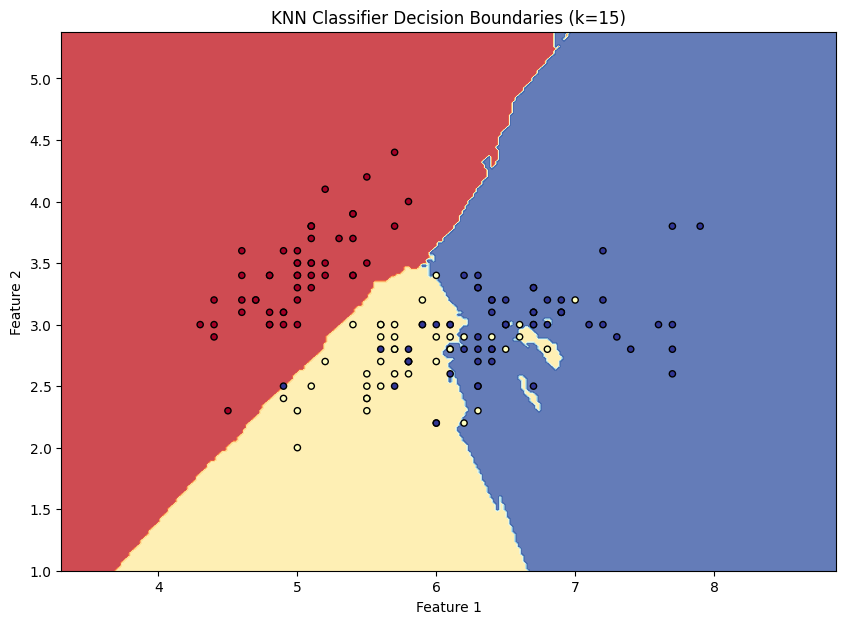

In [10]:
# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
plt.title("KNN Classifier Decision Boundaries (k=15)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

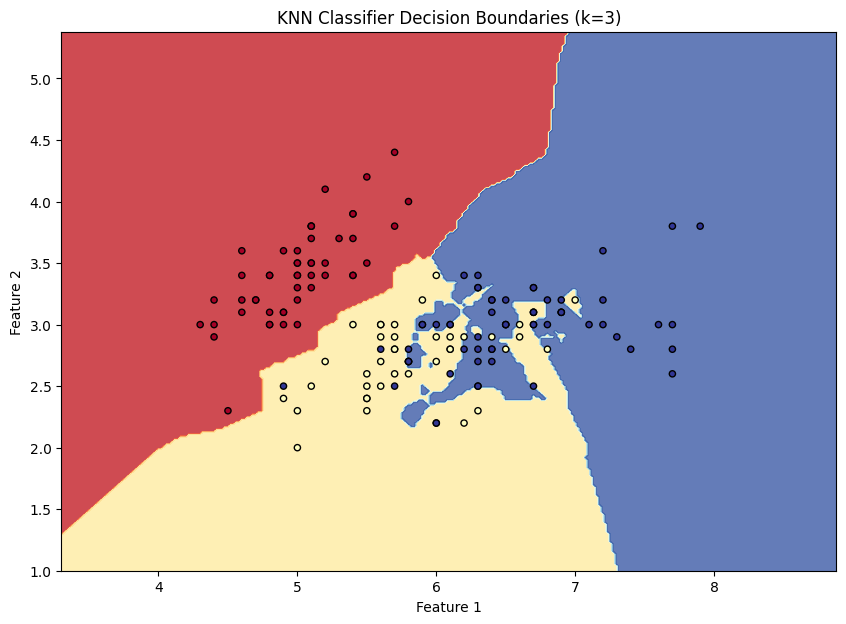

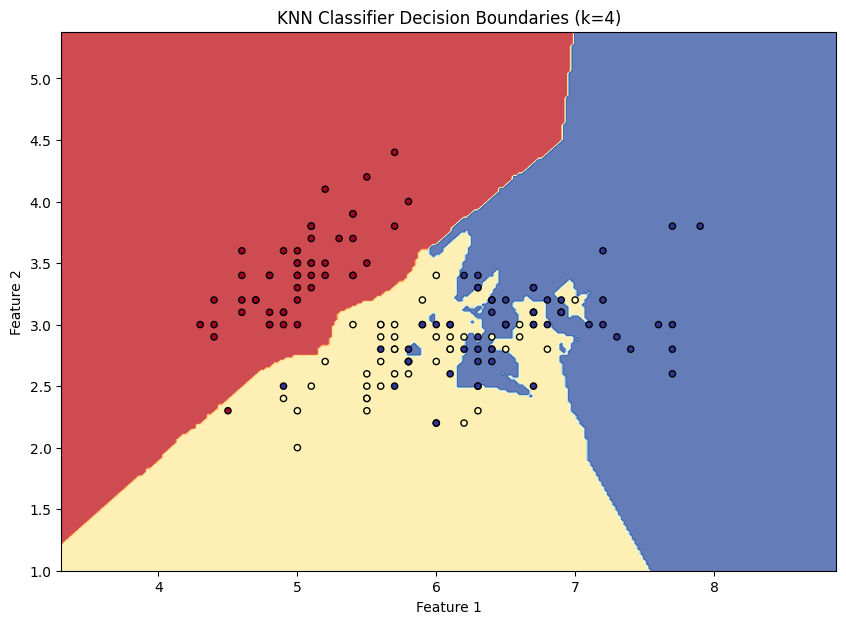

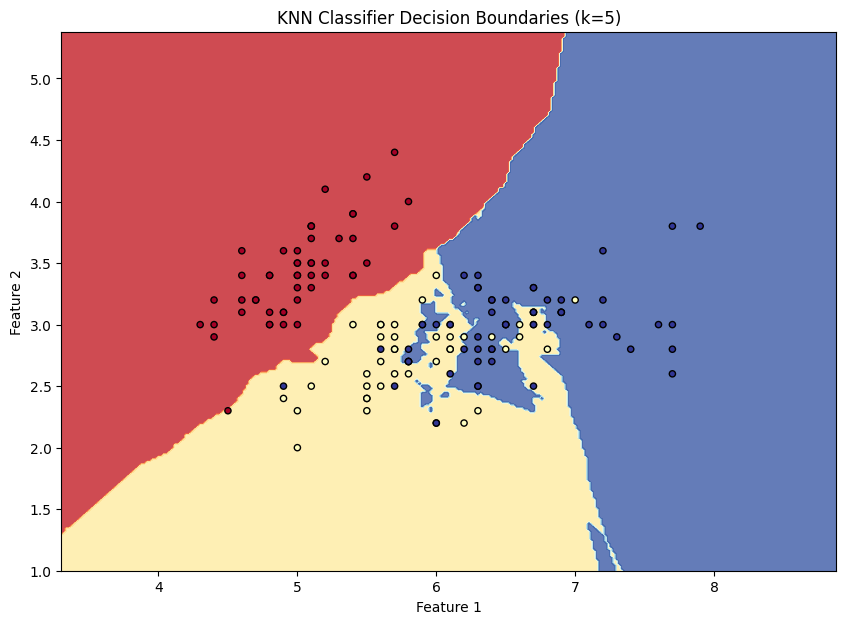

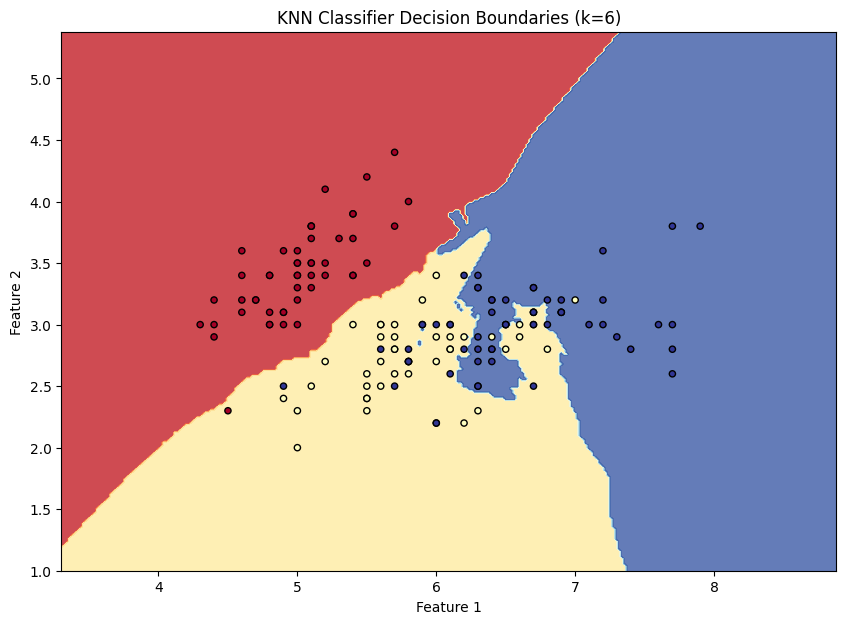

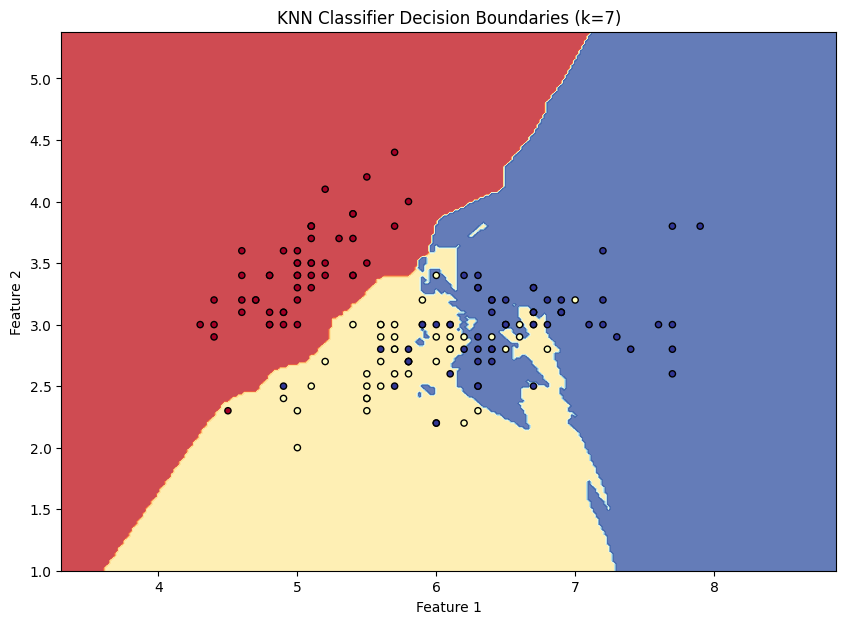

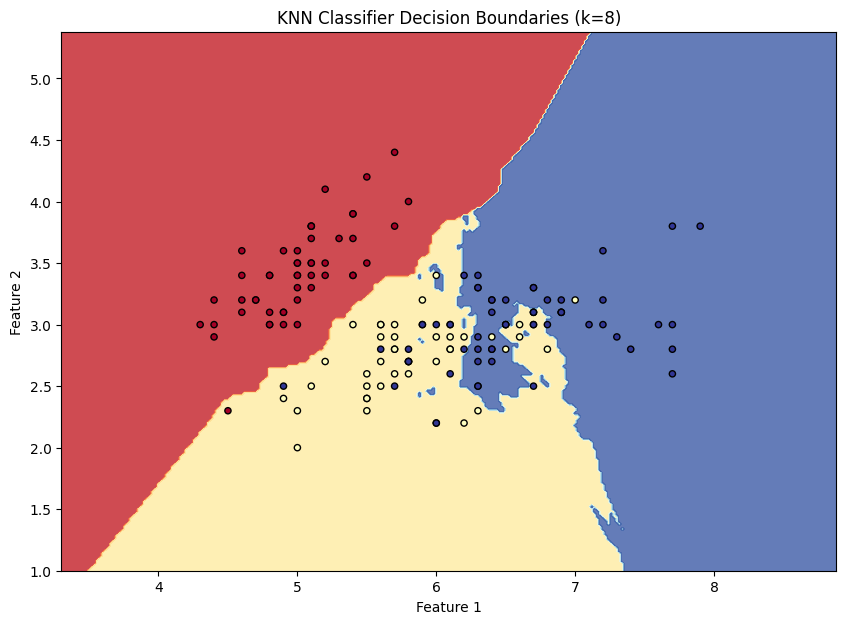

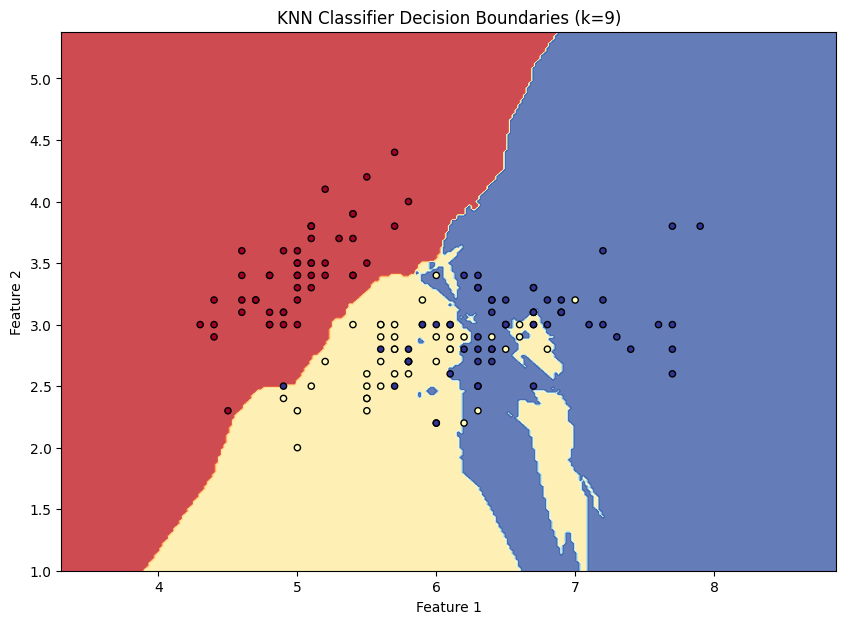

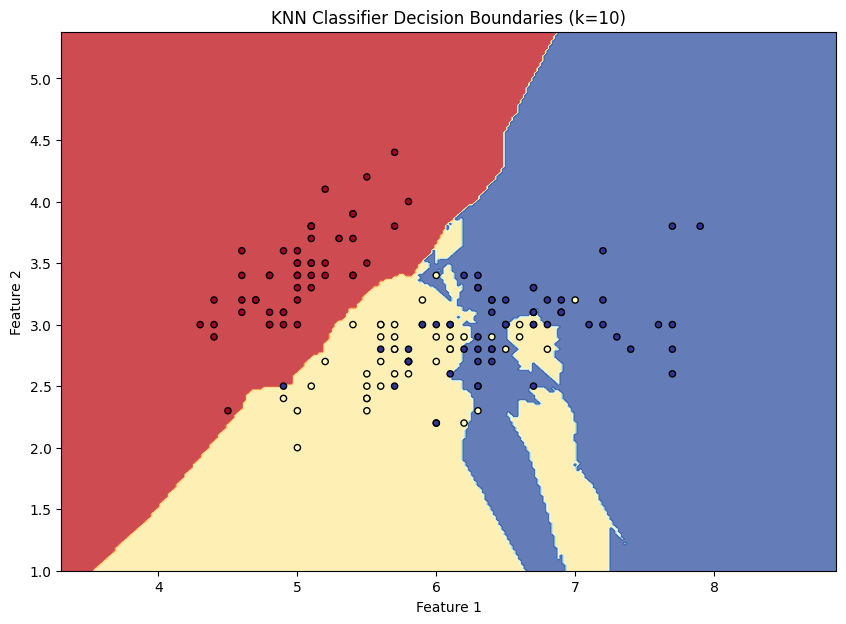

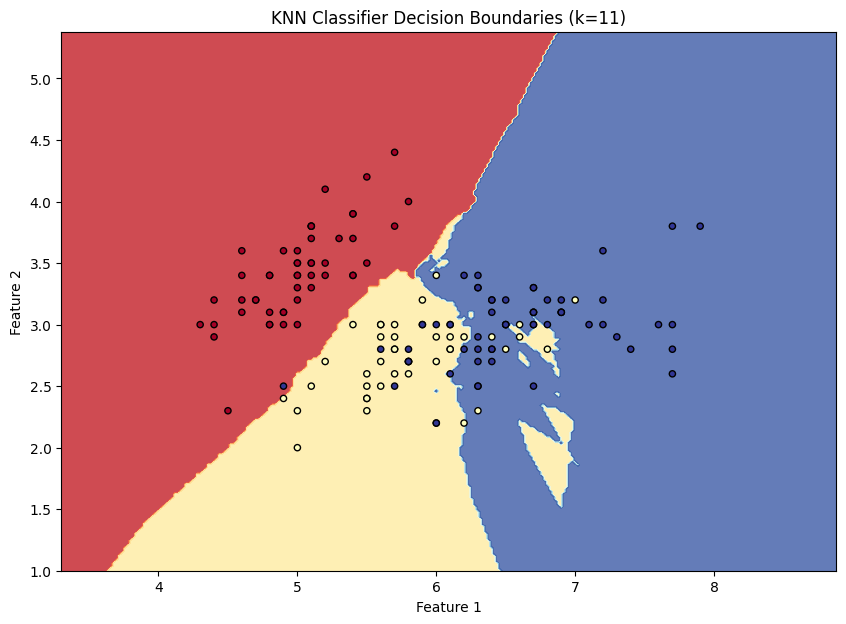

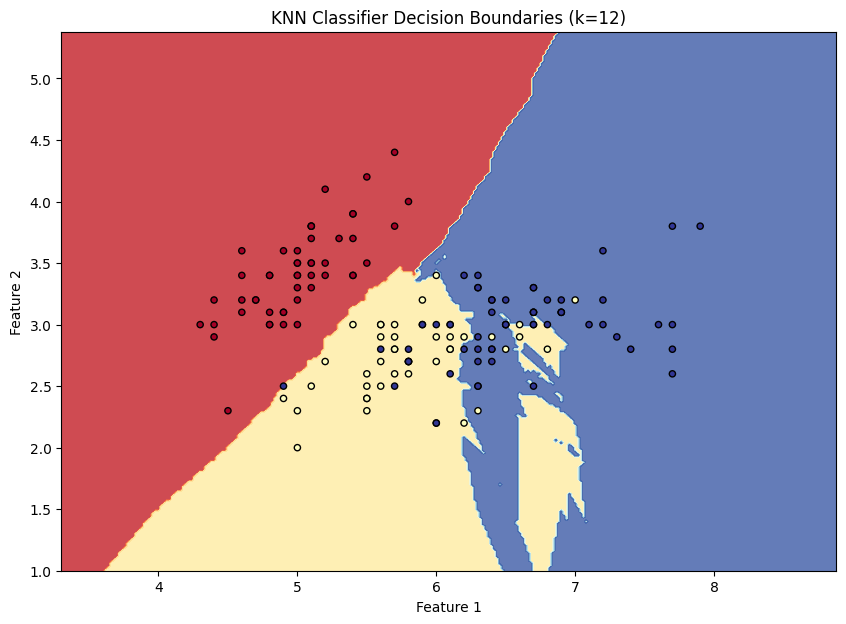

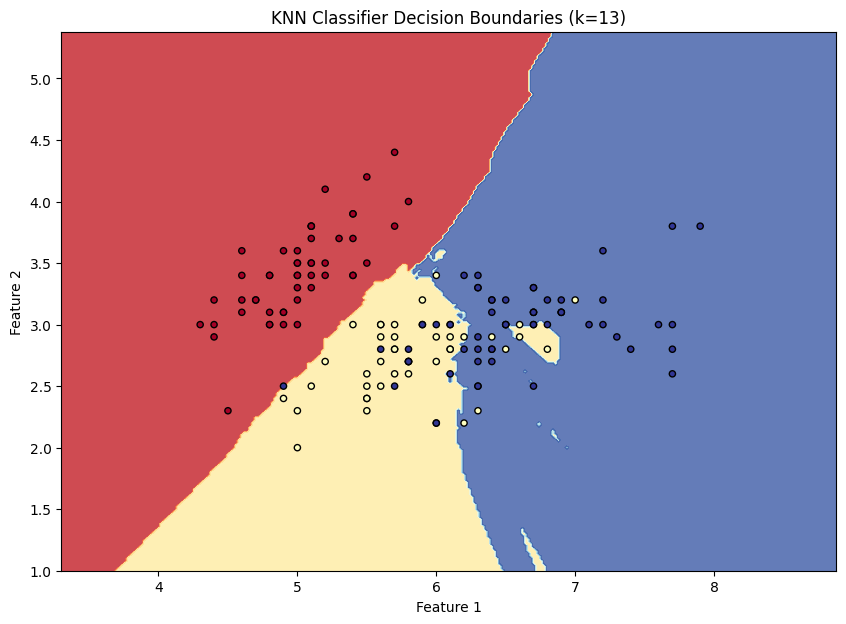

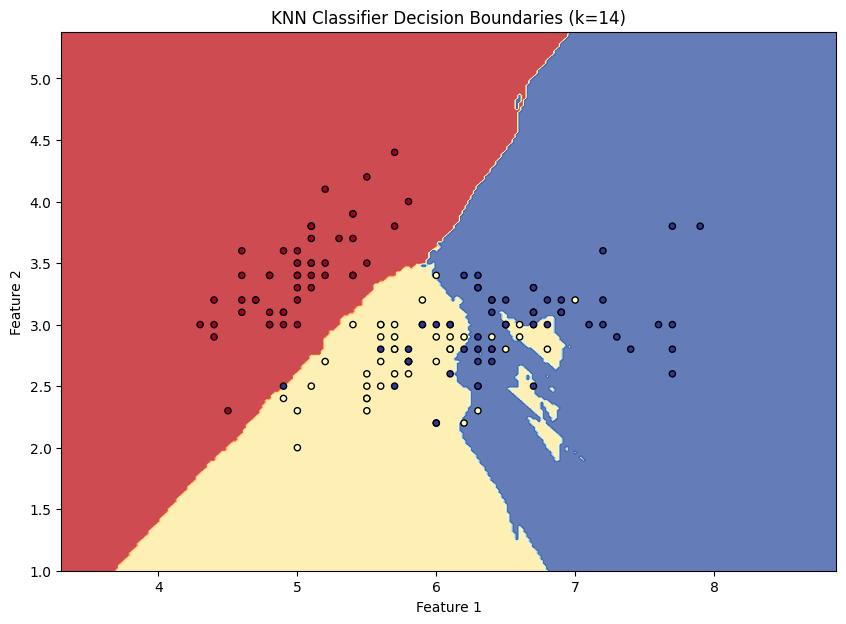

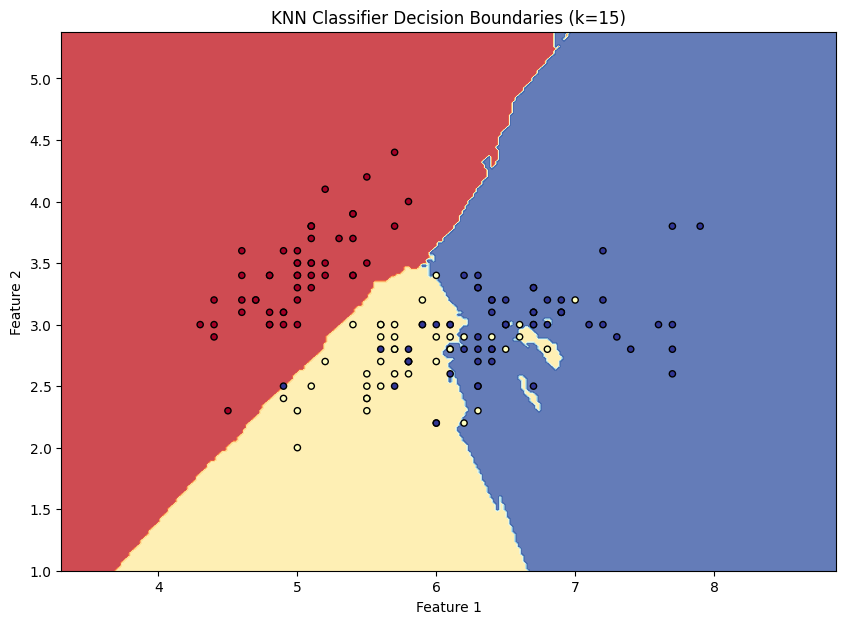

In [11]:
# Iterate from k=3 to k=15
for k_value in range(3, 16):
    # Initialize and fit the classifier for the current k
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_value)
    clf.fit(X, y)

    # Determine the range of the features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.title(f"KNN Classifier Decision Boundaries (k={k_value})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features
y = iris.target

# Split the data into training and testing sets
# Using a common split ratio of 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print evaluation metrics

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
# Create a DataFrame for better readability of the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f'Actual {i}' for i in iris.target_names],
                              columns=[f'Predicted {i}' for i in iris.target_names])
print(conf_matrix_df)
print("\n")

# 3. Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n")
print(class_report)

Accuracy: 0.8000

Confusion Matrix:

                   Predicted setosa  Predicted versicolor  Predicted virginica
Actual setosa                    19                     0                    0
Actual versicolor                 0                     8                    5
Actual virginica                  0                     4                    9


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.67      0.62      0.64        13
   virginica       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



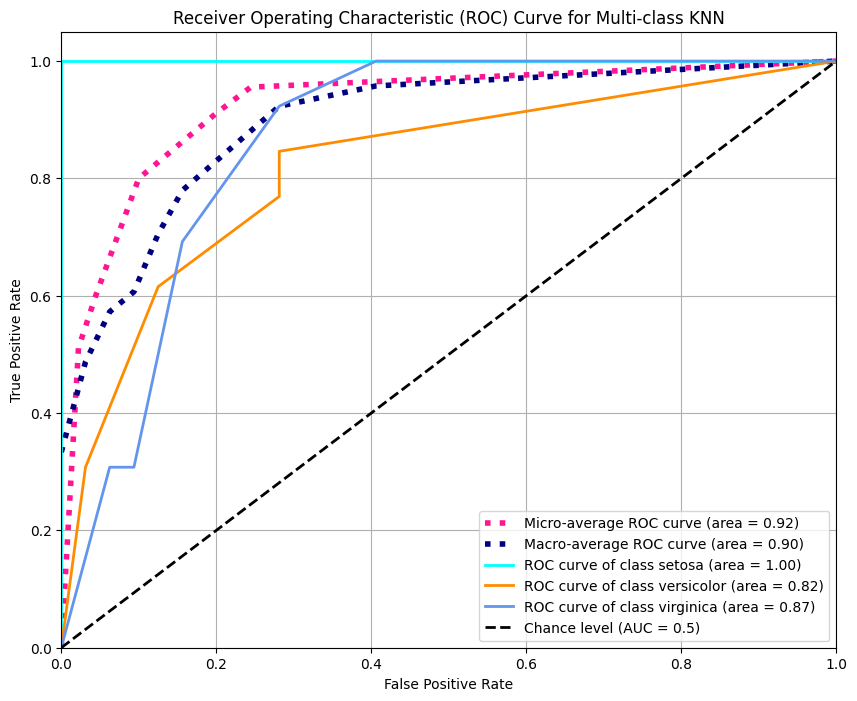

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle # For cycling through colors in plots
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for consistency with previous plots
y = iris.target
target_names = iris.target_names
n_classes = len(target_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier (using k=5 as an example, you can adjust)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Get prediction probabilities for the test set
# We need probabilities for ROC curves, not just hard predictions
y_score = knn.predict_proba(X_test)

# Binarize the true labels for OvR strategy
# Example: If y_test is [0, 1, 2], binarized for 3 classes might be [[1,0,0], [0,1,0], [0,0,1]]
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# This aggregates the contribution from all classes
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# This averages the ROC metrics of individual classes
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()